# Assignment: Regression on the Diabetes Dataset

Here we will practice doing regression with [scikit-learn's diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).  (Throughout the following, you are welcome to add additional cells if you need them for coding.)

Execute the following cell to get us started.

In [1]:
# Import scikit-learn's example diabetes dataset
import sklearn.datasets 
diabetes = sklearn.datasets.load_diabetes()

# Print a description of the dataset
print(diabetes.DESCR)

# Get the feature and target arrays
x = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## ML steps

* `x` is now a numpy array containing 10 features and 442 records (corresponding to 442 patients).  
* `y` is a numpy array containing the target values
  * as in the description, `y` is a quantitative measure of disease progression one year after baseline.

Print the array dimensions of x and y and confirm that the dimensions match the sizes above.

In [2]:
print(x.shape)
print(y.shape)

(442, 10)
(442,)


Make scatter plots to look at the relationship between y and each of the 10 features of x.  You should have 10 plots in total.

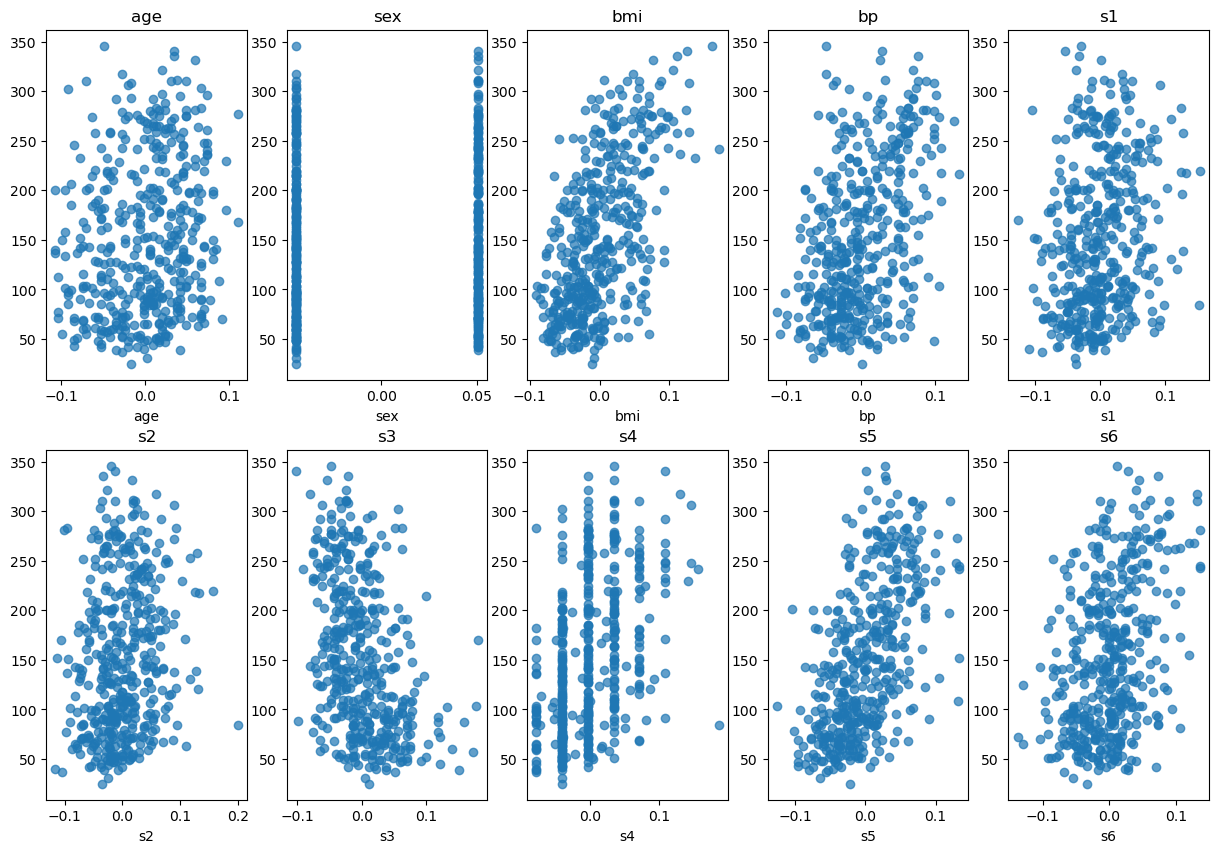

In [3]:
from matplotlib import pyplot as plt
feature_names = [
    "age", 
    "sex", 
    "bmi", 
    "bp", 
    "s1", 
    "s2", 
    "s3", 
    "s4", 
    "s5", 
    "s6"
]

plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.scatter(x[:, i], y, alpha=0.7)
    plt.xlabel(feature_names[i])
    plt.title(feature_names[i])

plt.show()

Print the 10 correlation coefficients between y and the 10 features in x. 
* You may find it useful to use either [numpy's corrcoef method](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or [pandas dataframe corr method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) for calculating the correlation coefficients.

In [26]:
import numpy as np
correlations = [np.corrcoef(x[:, i], y)[0, 1] for i in range(x.shape[1])]

for name, corr in zip(feature_names, correlations):
    print(f"{name}: {corr:}")

age: 0.18788875071891983
sex: 0.04306199845160539
bmi: 0.5864501344746885
bp: 0.44148175856257094
s1: 0.21202248101455073
s2: 0.17405358696874254
s3: -0.39478925067091863
s4: 0.43045288474477295
s5: 0.5658825924427441
s6: 0.382483484248581


Now we will perform linear regression using the feature in x that has the highest correlation coefficient with y

What is the name of the most correlated feature variable?
* You can print this out using either Python or Markdown, but you should include the variable name, the quantitative value of the correlation coefficient, and a comment about whether this makes sense to you from your common sense knowledge about diabetes.
* Note that the feature variable names are in the documentation above and accessible in the list `diabetes.feature_names`

In [18]:
max_corr_index = np.argmax(np.abs(correlations))
most_correlated_feature = feature_names[max_corr_index]
max_corr_value = correlations[max_corr_index]

print(f"Most correlated feature: {most_correlated_feature}")
print(f"Correlation coefficient: {max_corr_value:}")

Most correlated feature: bmi
Correlation coefficient: 0.5864501344746885


Initialize an object for doing linear regression and train the model using the `fit` method.

In [6]:
from sklearn.linear_model import LinearRegression
X_train = x[:, max_corr_index].reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y)

LinearRegression()

Print the intercept and slope for the best fit line determined by this training process.

In [17]:
print(f"Intercept: {model.intercept_:}")
print(f"Slope: {model.coef_[0]:}")

Intercept: 152.13348416289617
Slope: 949.4352603840372


Plot the linear model as a red line on top of a scatter plot showing your data points as black circles.

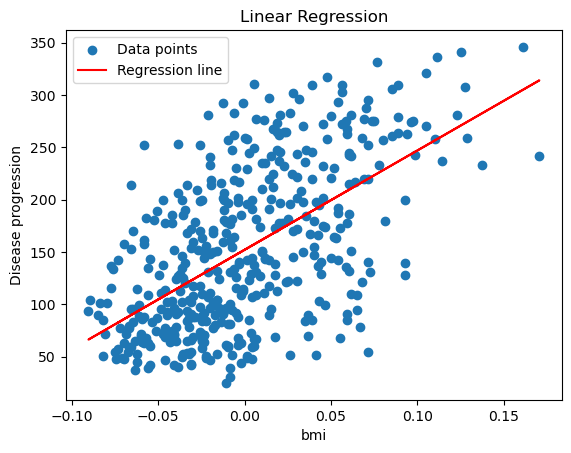

In [8]:
y_pred = model.predict(X_train)

plt.scatter(X_train, y, label='Data points')

plt.plot(X_train, y_pred, color='red', label='Regression line')

plt.xlabel(most_correlated_feature)
plt.ylabel('Disease progression')
plt.title(f'Linear Regression')
plt.legend()
plt.show()

Print the mean squared error and R$^2$ values for your model as assessed against your data.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:}")
print(f"R2 score: {r2:}")

Mean Squared Error: 3697.6382172259932
R2 score: 0.376440136443027


Repeat each of the steps that you did above for linear regression, but now:
* Use the k-nearest neighbors algorithm rather than linear regression
* Choose three different values for the number of neighbors, and for each choice, make a plot of the prediction curve on top of your data and print out the values of mean squared error and R$^2$.

k = 3,  MSE = 3080.1591251885375,  R2 = 0.4805701664136218
k = 12,  MSE = 3534.2269356460533,  R2 = 0.4039973798669392
k = 24,  MSE = 3697.6382172259932,  R2 = 0.376440136443027


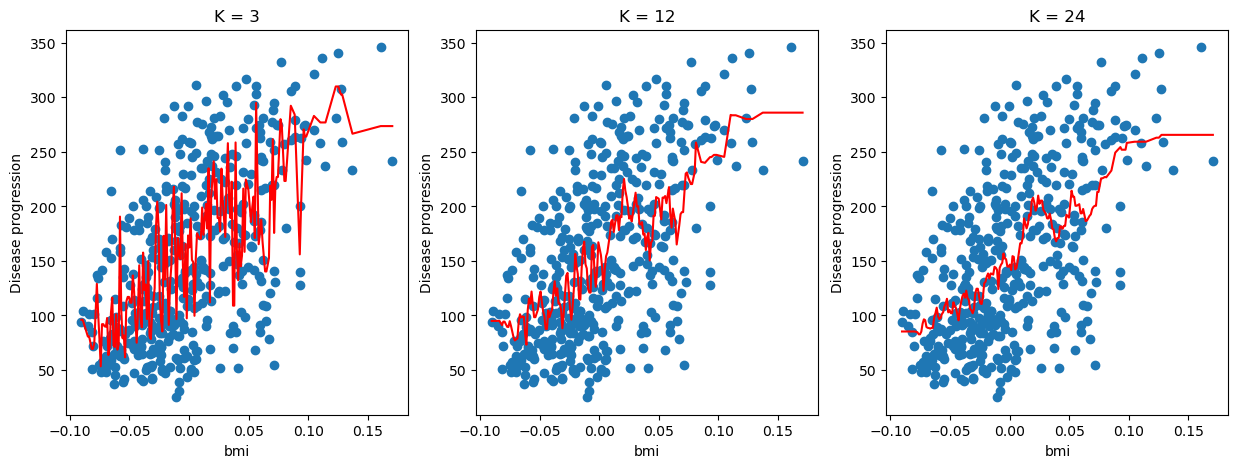

In [25]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [3, 12, 24]

plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y)
    y_pred = knn.predict(X_train)

    # MSE + R2
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"k = {k},  MSE = {mse:},  R2 = {r2:}")

    # Plot the results
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y)
    X_sorted = np.sort(X_train, axis=0)
    plt.plot(X_sorted, knn.predict(X_sorted), color="red")
    plt.title(f"K = {k}")
    plt.xlabel(most_correlated_feature)
    plt.ylabel("Disease progression")

plt.show()

## Submit

* Save your work (File -> Save Notebook)
* Verify that your notebook runs without error by restarting the kernel (or closing and opening the notebook) and selecting the top menu item for Run -> Run All Cells.  It should run successfully all the way to the bottom.
* Save your notebook again.  Keep all the output visible when saving the final version.
* If you are running this on the JupyterHub, download the file to your computer.
* Submit the file through the Canvas Assignment.